In [1137]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [1138]:
import warnings
warnings.filterwarnings('ignore')

In [1139]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [1140]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [1141]:
train_C2H6

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Cx_A_C2H6**2,Pe_ef_C2H6,G_B_C2H6
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,0.181389,0.840950,0.239689,-0.190170,3.261401
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,0.068624,0.481135,0.060755,-0.143749,3.287555
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.087099,0.311532,0.029178,0.593639,3.286083
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.114547,0.348560,0.054749,4.228007,3.287569
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.143525,0.452051,0.091083,-0.320362,3.287977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.155353,0.216464,3.565425,25.290106,11.672736,17.135854,4.134547,3.636717,4.376317,413927.628982,0.042416,0.539613,-0.137349,0.504463,0.001799,0.121100,3.615553
5794,72.287969,0.215898,3.566049,25.334587,11.686131,17.151060,4.144507,3.651892,4.405751,414422.236383,0.050128,0.501592,-0.133647,0.521579,0.002513,0.047960,3.621315
5795,72.404857,0.215134,3.567408,25.389464,11.700725,17.164479,4.149537,3.659761,4.434990,414917.947209,0.055266,0.504933,-0.119037,0.553583,0.003054,0.050745,3.629345
5796,72.530098,0.213966,3.567123,25.447651,11.715075,17.177206,4.152991,3.664572,4.459376,415307.622535,0.061938,0.501486,-0.105843,0.582407,0.003836,0.062986,3.641101


In [1142]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [1143]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [1144]:
train_C3H8

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_C3H8
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.190170,27.603653
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,1.484397,0.004709,0.231491,-0.143749,27.783881
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.156325,0.007586,0.097052,0.593639,27.734744
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.215011,0.013121,0.121494,4.228007,27.679363
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.631212,0.020599,0.204350,-0.320362,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.155353,0.216464,3.565425,25.290106,11.672736,17.135854,4.134547,3.636717,4.376317,413927.628982,0.042416,0.539613,0.291183,0.018865,0.254483,0.121100,25.791697
5794,72.287969,0.215898,3.566049,25.334587,11.686131,17.151060,4.144507,3.651892,4.405751,414422.236383,0.050128,0.501592,0.251594,0.017861,0.272045,0.047960,25.839520
5795,72.404857,0.215134,3.567408,25.389464,11.700725,17.164479,4.149537,3.659761,4.434990,414917.947209,0.055266,0.504933,0.254957,0.014170,0.306454,0.050745,25.890950
5796,72.530098,0.213966,3.567123,25.447651,11.715075,17.177206,4.152991,3.664572,4.459376,415307.622535,0.061938,0.501486,0.251489,0.011203,0.339198,0.062986,25.953647


In [1145]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [1146]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [1147]:
train_iC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_iC4H10
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,0.239689,5.028694,0.032902,0.707197,-0.190170,12.325097
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,0.060755,1.484397,0.004709,0.231491,-0.143749,12.365565
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.029178,0.156325,0.007586,0.097052,0.593639,12.360900
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.054749,0.215011,0.013121,0.121494,4.228007,12.351922
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.091083,0.631212,0.020599,0.204350,-0.320362,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.155353,0.216464,3.565425,25.290106,11.672736,17.135854,4.134547,3.636717,4.376317,413927.628982,0.042416,0.539613,0.001799,0.291183,0.018865,0.254483,0.121100,11.539090
5794,72.287969,0.215898,3.566049,25.334587,11.686131,17.151060,4.144507,3.651892,4.405751,414422.236383,0.050128,0.501592,0.002513,0.251594,0.017861,0.272045,0.047960,11.567094
5795,72.404857,0.215134,3.567408,25.389464,11.700725,17.164479,4.149537,3.659761,4.434990,414917.947209,0.055266,0.504933,0.003054,0.254957,0.014170,0.306454,0.050745,11.594882
5796,72.530098,0.213966,3.567123,25.447651,11.715075,17.177206,4.152991,3.664572,4.459376,415307.622535,0.061938,0.501486,0.003836,0.251489,0.011203,0.339198,0.062986,11.624912


In [1148]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [1149]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [1150]:
train_nC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_nC4H10
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,0.239689,5.028694,0.032902,0.707197,-0.190170,17.367120
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,0.060755,1.484397,0.004709,0.231491,-0.143749,17.383997
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.029178,0.156325,0.007586,0.097052,0.593639,17.373582
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.054749,0.215011,0.013121,0.121494,4.228007,17.358515
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.091083,0.631212,0.020599,0.204350,-0.320362,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.155353,0.216464,3.565425,25.290106,11.672736,17.135854,4.134547,3.636717,4.376317,413927.628982,0.042416,0.539613,0.001799,0.291183,0.018865,0.254483,0.121100,17.657433
5794,72.287969,0.215898,3.566049,25.334587,11.686131,17.151060,4.144507,3.651892,4.405751,414422.236383,0.050128,0.501592,0.002513,0.251594,0.017861,0.272045,0.047960,17.704643
5795,72.404857,0.215134,3.567408,25.389464,11.700725,17.164479,4.149537,3.659761,4.434990,414917.947209,0.055266,0.504933,0.003054,0.254957,0.014170,0.306454,0.050745,17.746887
5796,72.530098,0.213966,3.567123,25.447651,11.715075,17.177206,4.152991,3.664572,4.459376,415307.622535,0.061938,0.501486,0.003836,0.251489,0.011203,0.339198,0.062986,17.785023


In [1151]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [1152]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [1153]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [1154]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [1155]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [1156]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [1157]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [1158]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [1159]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [1160]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.14367334742437987

In [1161]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.016411925456402715, max:0.02286908954032158, min:0.013487928065053466, std:0.003314967352876705


In [1162]:
lr_scoring

array([0.01348793, 0.02286909, 0.014976  , 0.01489468, 0.01583193])

In [1163]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.03690893438703804, max:0.10129141930894946, min:0.016655122579987344, std:0.03280509862550706


In [1164]:
lr_scoring

array([0.10129142, 0.03304447, 0.01665512, 0.01669384, 0.01685981])

### C3H8

In [1165]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [1166]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.13568700622889732

In [1167]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.41141114826021175, max:1.708650151355392, min:0.05815667649680936, std:0.6489588064045387


In [1168]:
lr_scoring

array([0.12309321, 1.70865015, 0.07892304, 0.05815668, 0.08823266])

In [1169]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.4422720742329407, max:1.3945145708170956, min:0.08100918818832151, std:0.51058205869673


In [1170]:
lr_scoring

array([1.39451457, 0.56118598, 0.08105529, 0.09359533, 0.08100919])

### iC4H10

In [1171]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [1172]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7644157493971323

In [1173]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.45702527556549377, max:1.4336254376987583, min:0.14849099973389787, std:0.49200507477720656


In [1174]:
lr_scoring

array([0.16405905, 1.43362544, 0.21836476, 0.148491  , 0.32058613])

In [1175]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.9978902192957357, max:13.766156628090728, min:0.15031452144191154, std:5.384951401325149


In [1176]:
lr_scoring

array([13.76615663,  0.44434311,  0.15031452,  0.33076695,  0.29786989])

### nC4H10

In [1177]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [1178]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

6.036792074417476

In [1179]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.8986687149980916, max:3.295210699172388, min:0.22754152232702135, std:1.2006496258429327


In [1180]:
lr_scoring

array([0.29558824, 3.2952107 , 0.23638477, 0.22754152, 0.43861835])

In [1181]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.4818653590713753, max:10.508066711565908, min:0.28189900929573375, std:4.017138029345009


In [1182]:
lr_scoring

array([10.50806671,  0.80441055,  0.34753172,  0.28189901,  0.4674188 ])

# lasso_regressor

### C2H6

In [1183]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [1184]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.1609790835961578

In [1185]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.743454447815006, max:1.3587413396656869, min:0.3230987714327371, std:0.4040454405988601


In [1186]:
ls_scoring

array([1.35874134, 1.08443521, 0.49914197, 0.45185494, 0.32309877])

In [1187]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1188]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1189]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1190]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.36 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1191]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1192]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6790992684271697
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1193]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0303205892166067

In [1194]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1195]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.34 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1196]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1197]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6285670511855047
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1198]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0303205892166067

### C3H8

In [1199]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [1200]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6664879013802474

In [1201]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.8368650890925666, max:10.205853761842452, min:0.3269762399989796, std:3.7044948025797124


In [1202]:
ls_scoring

array([ 1.17005881, 10.20585376,  1.50648175,  0.32697624,  0.97495488])

In [1203]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.6110946566389677, max:7.709117457410348, min:0.45564346405280565, std:2.7732596774941976


In [1204]:
ls_scoring

array([7.70911746, 3.44234644, 0.45564346, 0.66422952, 0.7841364 ])

In [1205]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1206]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1207]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1208]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.2 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1209]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1210]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.2464922096778768
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1211]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7142561380889287

In [1212]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1213]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.62 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1214]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1215]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.59075925869563
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1216]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7142561380889287

### iC4H10

In [1217]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [1218]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9343840459832903

In [1219]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2820780821052005, max:4.577243058293272, min:0.3139665664751153, std:1.6504583116650609


In [1220]:
ls_scoring

array([0.57080672, 4.57724306, 0.55612671, 0.31396657, 0.39224736])

In [1221]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.1965882445102551, max:2.8716516113383377, min:0.23478485127991253, std:1.0981962238207956


In [1222]:
ls_scoring

array([2.87165161, 2.14819404, 0.30158914, 0.23478485, 0.42672157])

In [1223]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1224]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1225]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1226]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.44 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1227]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1228]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1660894450023715
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1229]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8351318494970612

In [1230]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1231]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.77 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1232]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1233]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0955639363156098
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1234]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8351318494970612

### nC4H10

In [1235]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [1236]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3144002669268384

In [1237]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.5814677438232434, max:6.4008923099002875, min:0.2927127770353091, std:2.4101323882891443


In [1238]:
ls_scoring

array([0.42418723, 6.40089231, 0.38577127, 0.29271278, 0.40377513])

In [1239]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.5262380519550391, max:3.8656653823186753, min:0.24225324605813864, std:1.5222943295249807


In [1240]:
ls_scoring

array([3.86566538, 2.82386119, 0.24225325, 0.26884088, 0.43056955])

In [1241]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1242]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1243]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1244]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.21 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1245]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1246]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5043797141386757
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1247]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1924226074270345

In [1248]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1249]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.69 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1250]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1251]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4448143337335508
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1252]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1924226074270345

# SGDRegressor

### C2H6

In [1253]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [1254]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8311657470067134

In [1255]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.23915064262300106, max:0.5288148202492201, min:0.08250825705157544, std:0.1618162842292335


In [1256]:
SGD_scoring

array([0.09528119, 0.52881482, 0.27392682, 0.08250826, 0.21522212])

In [1257]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.4282813219176225, max:5.581587545412137, min:0.08190294418489964, std:2.1079548834545254


In [1258]:
SGD_scoring

array([5.58158755, 1.0825399 , 0.08190294, 0.14100831, 0.25436791])

In [1259]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1260]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [1261]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1262]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 11.8 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1263]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1264]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.1746098151739015
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.0001}


In [1265]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.9052465923241133

In [1266]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1267]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 8.84 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1268]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1269]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.226429398964705
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [1270]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8067142629156923

### C3H8

In [1271]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [1272]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.6952333028913198

In [1273]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:2.4552166980979093, max:10.347859511812374, min:0.25738753799705383, std:3.949505151638815


In [1274]:
SGD_scoring

array([ 0.40487767, 10.34785951,  0.74184475,  0.25738754,  0.52411402])

In [1275]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:8.579494517033789, max:36.97778747496588, min:0.3856386513703847, std:14.289281069496942


In [1276]:
SGD_scoring

array([36.97778747,  4.58056612,  0.39081536,  0.56266497,  0.38563865])

In [1277]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1278]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [1279]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1280]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 16.3 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1281]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1282]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-3.2639836058732814
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1283]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.267866080097424

In [1284]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1285]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 11.6 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1286]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1287]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-10.857798245885517
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1288]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.4133945033912845

### iC4H10

In [1289]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [1290]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.3543696276493609

In [1291]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.3530507788698865, max:5.918159986428616, min:0.17249037344677157, std:2.282763362055306


In [1292]:
SGD_scoring

array([0.19327882, 5.91815999, 0.17249037, 0.21605656, 0.26526815])

In [1293]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:4.406338478642207, max:19.468785519462532, min:0.12786072935005213, std:7.563464610282288


In [1294]:
SGD_scoring

array([19.46878552,  1.98811361,  0.16580149,  0.12786073,  0.28113105])

In [1295]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1296]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [1297]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1298]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 15.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1299]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1300]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.5191045549439202
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1301]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.6544335129575714

In [1302]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1303]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 10.4 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1304]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1305]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-5.081407271078096
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1306]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.7141708239820743

### nC4H10

In [1307]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [1308]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.593721623331802

In [1309]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.7434889361696346, max:7.2800012985477744, min:0.3230442718378535, std:2.7684258103788713


In [1310]:
SGD_scoring

array([0.32304427, 7.2800013 , 0.38440377, 0.32834849, 0.40164685])

In [1311]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:6.174283115416313, max:27.38452204887242, min:0.32268675619266746, std:10.629145125706568


In [1312]:
SGD_scoring

array([27.38452205,  2.25164584,  0.32268676,  0.45968245,  0.45287848])

In [1313]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1314]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [1315]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1316]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 15.4 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1317]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1318]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.9205028366428343
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1319]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.739960054076322

In [1320]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1321]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 11.2 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1322]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1323]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-7.1789945199134815
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1324]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.9041973309891362

# GradientBoostingRegressor

### C2H6

In [1325]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [1326]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.6075742763835528

In [1327]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.23080642756924946, max:0.3563919683862224, min:0.06738485594564034, std:0.12827426137245468


In [1328]:
GBR_scoring

array([0.06738486, 0.35639197, 0.30767157, 0.08259998, 0.33998376])

In [1329]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.4833893154861363, max:1.2129744187663574, min:0.13978379723133946, std:0.3867796443672666


In [1330]:
GBR_scoring

array([1.21297442, 0.4842368 , 0.18316992, 0.1397838 , 0.39678164])

In [1331]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1332]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1333]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1334]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [1335]:
#randomized_grid_cv.best_estimator_

In [1336]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1337]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [1338]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1339]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [1340]:
#randomized_grid_cv.best_estimator_

In [1341]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1342]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [1343]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [1344]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.382786190312345

In [1345]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.8612875453459526, max:2.175452467819091, min:0.30497845317012845, std:0.6760979159909888


In [1346]:
GBR_scoring

array([0.52344403, 2.17545247, 0.80407094, 0.30497845, 0.49849183])

In [1347]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.2560348517757225, max:6.781243297046089, min:0.40942283171762783, std:2.4196095377578755


In [1348]:
GBR_scoring

array([6.7812433 , 2.75117938, 0.44158994, 0.89673881, 0.40942283])

In [1349]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1350]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1351]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1352]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [1353]:
#randomized_grid_cv.best_estimator_

In [1354]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1355]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [1356]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1357]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [1358]:
#randomized_grid_cv.best_estimator_

In [1359]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1360]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [1361]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [1362]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8003363831303427

In [1363]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.45051561079734626, max:1.1288735774135434, min:0.23284367120581836, std:0.3418500339947898


In [1364]:
GBR_scoring

array([0.23284367, 1.12887358, 0.30733974, 0.2376729 , 0.34584817])

In [1365]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.9571499242420494, max:2.532927903935668, min:0.18684191495604632, std:0.8924604016458322


In [1366]:
GBR_scoring

array([2.5329279 , 1.36606561, 0.18684191, 0.32351018, 0.37640402])

In [1367]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1368]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1369]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1370]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1371]:
#randomized_grid_cv.best_estimator_

In [1372]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1373]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [1374]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1375]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1376]:
#randomized_grid_cv.best_estimator_

In [1377]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1378]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [1379]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [1380]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.201394095190958

In [1381]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5633998795553653, max:1.6316637335455881, min:0.20486820572118425, std:0.5365868569785086


In [1382]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.3002688466439767, max:3.4847642280849223, min:0.261200872648109, std:1.2880973437663157


In [1383]:
GBR_scoring

array([3.48476423, 2.07494515, 0.35982573, 0.26120087, 0.32060825])

In [1384]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1385]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1386]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1387]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1388]:
#randomized_grid_cv.best_estimator_

In [1389]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1390]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [1391]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1392]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1393]:
#randomized_grid_cv.best_estimator_

In [1394]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1395]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [1396]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [1397]:
test_data

,A_C2H6,A_C3H8,A_C6H14,A_CH4,A_iC4H10,A_iC5H12,A_nC4H10,A_nC5H12,A_rate,A_rate**2,B_rate,B_rate**2,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Re_A,Re_A**2,e**A_rate,e**B_rate,lg_A_rate,lg_Re_A,ln_A_rate,ln_Re_A,month,mu_mix_A,ro_mix_A,sqrt_A_rate,sqrt_B_rate,sqrt_Re_A,timestamp,w_A,w_prev
0,5.055399,36.150185,6.350054,0.301398,16.628783,5.888891,24.371108,5.198700,70.537988,4975.607800,72.652285,5278.354546,0.073978,0.005473,0.505996,0.256032,-0.090163,0.008129,0.607818,0.369442,3.565976,25.499613,4.479200,0.212600,11.729609,4.153906,17.190889,3.667058,3.649526,25.977155,11.643295,17.818534,0.078364,0.369081,415585.912821,1.727117e+11,4.307835e+30,3.568507e+31,1.848423,5.618661,4.256151,12.937445,4.0,0.000150,563.204786,8.398690,8.523631,644.659532,2020-04-30 23:30:00,0.277212,0.276829
1,5.135159,36.816480,6.395286,0.267832,16.632260,5.696004,24.062587,4.939430,71.428342,5102.008078,74.273009,5516.479837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,1.755775e+11,1.049385e+31,1.804504e+32,1.853871,5.622234,4.268695,12.945673,5.0,0.000151,562.574167,8.451529,8.618179,647.317303,2020-05-01 00:00:00,0.281026,NaN
2,5.142402,36.842752,6.371121,0.268148,16.642065,5.686194,24.066193,4.925651,71.176730,5066.126880,74.167421,5500.806318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,1.744867e+11,8.159453e+30,1.623684e+32,1.852338,5.620881,4.265166,12.942557,5.0,0.000151,562.513894,8.436630,8.612051,646.309548,2020-05-01 00:30:00,0.280066,NaN
3,5.146473,36.920156,6.328293,0.268979,16.665032,5.649087,24.079513,4.886606,71.115060,5057.351702,74.063703,5485.432125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,1.744541e+11,7.671459e+30,1.463719e+32,1.851962,5.620841,4.264299,12.942464,5.0,0.000151,562.390951,8.432975,8.606027,646.279418,2020-05-01 01:00:00,0.279884,NaN
4,5.167520,37.036162,6.271631,0.270545,16.669608,5.615526,24.065133,4.847676,71.079396,5052.280554,73.985463,5473.848776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,1.748013e+11,7.402689e+30,1.353563e+32,1.851744,5.621272,4.263798,12.943458,5.0,0.000151,562.189616,8.430860,8.601480,646.600712,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,4.016049,39.564136,6.107097,0.119471,17.671798,4.591459,24.114457,3.764521,68.487747,4690.571518,71.084681,5053.031900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750501,27.096585,4.182613,0.081823,12.103016,3.144587,16.515449,2.578236,NaN,NaN,NaN,NaN,NaN,NaN,381668.536235,1.456709e+11,5.544351e+29,7.441916e+30,1.835613,5.581686,4.226655,12.852308,7.0,0.000159,563.113161,8.275732,8.431173,617.793280,2020-07-22 21:30:00,0.269198,NaN
3981,4.001332,39.483951,6.190751,0.119286,17.646161,4.610371,24.108275,3.788717,69.752031,4865.345870,71.466614,5107.476904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.791011,27.540858,4.318175,0.083204,12.308556,3.215828,16.816012,2.642707,NaN,NaN,NaN,NaN,NaN,NaN,388351.009372,1.508165e+11,1.963009e+30,1.090325e+31,1.843557,5.589224,4.244947,12.869665,7.0,0.000159,563.278606,8.351768,8.453793,623.178152,2020-07-22 22:00:00,0.274087,NaN
3982,3.985564,39.438651,6.238181,0.119306,17.630275,4.622657,24.109326,3.804659,71.719374,5143.668607,72.491632,5255.036768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.858422,28.285153,4.473984,0.085566,12.644323,3.315341,17.291058,

In [1398]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1399]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [1400]:
#test_data.loc[2500:2700]

In [1401]:
test_data.columns

Index(['A_C2H6', 'A_C3H8', 'A_C6H14', 'A_CH4', 'A_iC4H10', 'A_iC5H12',
       'A_nC4H10', 'A_nC5H12', 'A_rate', 'A_rate**2', 'B_rate', 'B_rate**2',
       'Cx_A_C2H6', 'Cx_A_C2H6**2', 'Cx_A_C3H8', 'Cx_A_C3H8**2', 'Cx_A_iC4H10',
       'Cx_A_iC4H10**2', 'Cx_A_nC4H10', 'Cx_A_nC4H10**2', 'G_A_C2H6',
       'G_A_C3H8', 'G_A_C6H14', 'G_A_CH4', 'G_A_iC4H10', 'G_A_iC5H12',
       'G_A_nC4H10', 'G_A_nC5H12', 'G_B_C2H6', 'G_B_C3H8', 'G_B_iC4H10',
       'G_B_nC4H10', 'Pe_ef_C2H6', 'Pe_ef_C3H8', 'Re_A', 'Re_A**2',
       'e**A_rate', 'e**B_rate', 'lg_A_rate', 'lg_Re_A', 'ln_A_rate',
       'ln_Re_A', 'month', 'mu_mix_A', 'ro_mix_A', 'sqrt_A_rate',
       'sqrt_B_rate', 'sqrt_Re_A', 'timestamp', 'w_A', 'w_prev'],
      dtype='object')

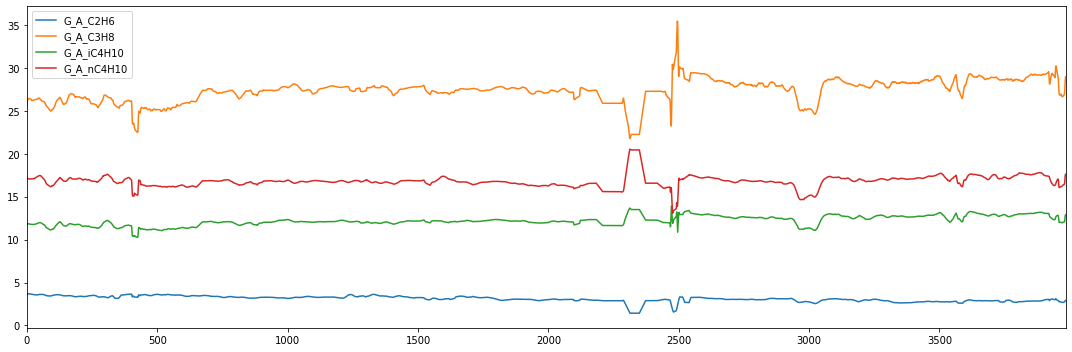

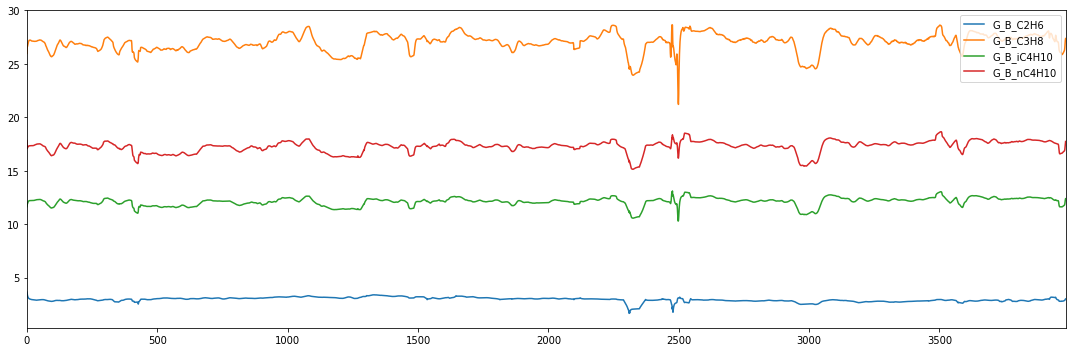

In [1402]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [1403]:
predict = pd.DataFrame()

In [1404]:
predict[['timestamp']] = test_data[['timestamp']]

In [1405]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [1406]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [1407]:
predict = pd.concat([predict,B] , axis=1)

In [1408]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.023277,35.755455,16.026055,24.525772
1,2020-05-01 00:00:00,4.694632,35.840268,15.936862,22.989855
2,2020-05-01 00:30:00,4.503505,35.890365,16.077523,23.119824
3,2020-05-01 01:00:00,4.371139,36.112076,16.204188,23.225623
4,2020-05-01 01:30:00,4.286243,36.336092,16.301331,23.298440
...,...,...,...,...,...
3980,2020-07-22 21:30:00,4.027709,37.007691,16.599162,23.745227
3981,2020-07-22 22:00:00,4.040774,37.125597,16.647582,23.774317
3982,2020-07-22 22:30:00,4.054651,37.165657,16.691634,23.804229
3983,2020-07-22 23:00:00,4.045588,36.907863,16.648304,23.783511


In [1409]:
predict.drop(0, axis=0, inplace=True)

In [1410]:
predict = predict.reset_index(drop=True)

In [1411]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.694632,35.840268,15.936862,22.989855
1,2020-05-01 00:30:00,4.503505,35.890365,16.077523,23.119824
2,2020-05-01 01:00:00,4.371139,36.112076,16.204188,23.225623
3,2020-05-01 01:30:00,4.286243,36.336092,16.301331,23.298440
4,2020-05-01 02:00:00,4.224300,36.506972,16.374353,23.353417
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.027709,37.007691,16.599162,23.745227
3980,2020-07-22 22:00:00,4.040774,37.125597,16.647582,23.774317
3981,2020-07-22 22:30:00,4.054651,37.165657,16.691634,23.804229
3982,2020-07-22 23:00:00,4.045588,36.907863,16.648304,23.783511


In [1412]:
predict.to_csv('predictSGD_24.csv', sep=',', header=True, index=False)

In [1413]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD_24.csv', header = 0, sep = ',')

In [1414]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [1415]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.694632,35.840268,15.936862,22.989855
1,2020-05-01 00:30:00,4.503505,35.890365,16.077523,23.119824
2,2020-05-01 01:00:00,4.371139,36.112076,16.204188,23.225623
3,2020-05-01 01:30:00,4.286243,36.336092,16.301331,23.298440
4,2020-05-01 02:00:00,4.224300,36.506972,16.374353,23.353417
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.027709,37.007691,16.599162,23.745227
3980,2020-07-22 22:00:00,4.040774,37.125597,16.647582,23.774317
3981,2020-07-22 22:30:00,4.054651,37.165657,16.691634,23.804229
3982,2020-07-22 23:00:00,4.045588,36.907863,16.648304,23.783511


In [1416]:
#test_data.to_excel('123.xlsx')